# Plane Waves

In [3]:
from pylab import meshgrid, cm, imshow, contour, clabel, figure, title, show
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Meshgrid

In [4]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = meshgrid(x, y)


# 1st, 2nd and 3rd order functions

In [5]:
def first_order(k_x, k_y, modulus):
    return np.cos(k_x*modulus)*np.cos(-0.5*k_x*modulus+np.sqrt(3)/2*k_y*modulus)*np.cos(-0.5*k_x*modulus-np.sqrt(3)/2*k_y*modulus)


def second_order(k_x, k_y, modulus):
    return (np.cos(k_x*modulus)*np.cos(-0.5*k_x*modulus+np.sqrt(3)/2*k_y*modulus)*np.cos(-0.5*k_x*modulus-np.sqrt(3)/2*k_y*modulus))**2


def third_order(k_x, k_y, modulus):
    return (np.cos(k_x*modulus)*np.cos(-0.5*k_x*modulus+np.sqrt(3)/2*k_y*modulus)*np.cos(-0.5*k_x*modulus-np.sqrt(3)/2*k_y*modulus))**3

# Lattice parameters

In [ ]:
a_Cr = 0.604
a_Au = 0.288

In [8]:
def plane_wave(k, x, y):
    for i in range(len(x)):
        for j in range(len(y)):
            A[i,j] = 1 + np.cos(k.dot(np.array([x[i,j],y[i,j]])))
    return A


x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
xx, yy = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
A = np.empty([len(x),len(y)])                    
k = np.array([-0.5,np.sqrt(3)/2])*2*np.pi/a_Au

planewave = plane_wave(k, xx, yy) 

%matplotlib qt
plt.imshow(planewave, cmap=cm.jet)
plt.show()

# Real space Lattice

In [10]:
Au_real = first_order(X, Y, 2*np.pi/a_Au)       ### IMPORTANT ###
Cr_real = second_order(X, Y, 2*np.pi/a_Cr)      ### IMPORTANT ###
moire_real = Au_real * Cr_real

# Reciprocal space Lattice

In [11]:
Cr_reciprocal = np.fft.fftshift(np.fft.fft2(Cr_real))
Au_reciprocal = np.fft.fftshift(np.fft.fft2(Au_real))
moire_reciprocal = np.fft.fftshift(np.fft.fft2(moire_real))

# Plot

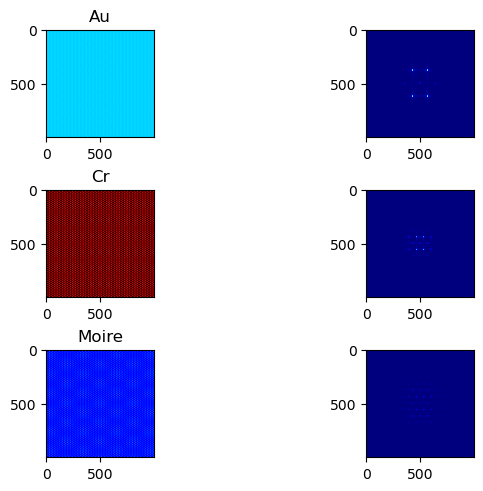

In [13]:
%matplotlib inline

fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [['Au', 'Au_reciprocal'],
     ['Cr', 'Cr_reciprocal'],
     ['moire_real', 'moire_reciprocal']]
)

ax_dict['Au'].imshow(Au_real, cmap=cm.jet)
ax_dict['Au'].set_title('Au')
ax_dict['Au_reciprocal'].imshow(abs(Au_reciprocal), vmin=0, vmax=10000, cmap=cm.jet)
ax_dict['Cr'].imshow(Cr_real, cmap=plt.cm.hot)
ax_dict['Cr'].set_title('Cr')
ax_dict['Cr_reciprocal'].imshow(abs(Cr_reciprocal), vmin=0, vmax=10000, cmap=cm.jet)
ax_dict['moire_real'].imshow(moire_real, cmap=cm.jet)
ax_dict['moire_real'].set_title('Moire')
ax_dict['moire_reciprocal'].imshow(abs(moire_reciprocal), vmin=0, vmax=10000, cmap=cm.jet)

plt.show()